In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
## train 데이터 셋 , test 데이터 셋
## train 은 학습을 위한 데이터 셋
## test 은 예측을 위한 데이터 셋(평가)
## parse_dates : datetime 컬럼을 시간형으로 불러올 수 있음
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv", parse_dates=['datetime'])
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [3]:
new_tr = train.copy()
new_test = test.copy()

In [4]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek

In [5]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test[  ['datetime', 'year', 'month', 'day', 'hour', 'dayofweek']   ]

,datetime,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,3
1,2011-01-20 01:00:00,2011,1,20,1,3
2,2011-01-20 02:00:00,2011,1,20,2,3
3,2011-01-20 03:00:00,2011,1,20,3,3
4,2011-01-20 04:00:00,2011,1,20,4,3
...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,2012,12,31,19,0
6489,2012-12-31 20:00:00,2012,12,31,20,0
6490,2012-12-31 21:00:00,2012,12,31,21,0
6491,2012-12-31 22:00:00,2012,12,31,22,0


In [6]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
print(X_train.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  
3  2011     3          5  
4  2011     4          5  


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

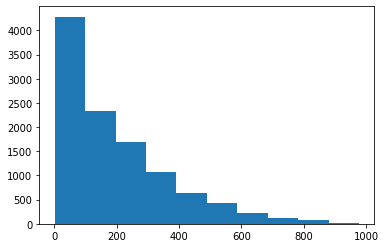

In [7]:
plt.hist(new_tr['count'])

In [8]:
new_tr['log_count'] = np.log1p(new_tr['count'] )
label_name = 'log_count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택
X_test.head()                       # 테스트 데이터 선택된 내용 보기

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [9]:
from sklearn.model_selection import cross_val_score
## 앙상블
from sklearn.ensemble import RandomForestRegressor
## 그레디언트 부스팅 모델
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import time

In [10]:
model_list = ["RandomForestRegressor",  "xgb_basic", "lightgbm-model1", "lightgbm-model2"]
model_score = []
model_time = []

In [11]:
now_time = time.time()
model_RF = RandomForestRegressor(random_state=30)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)
pro_time = time.time() - now_time
model_time.append(pro_time)
print(pro_time)  # 걸린 시간
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

20.138360738754272
RandomForestRegressor Score : 0.23269844834539466


In [12]:
# data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
now_time = time.time()
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3,
            alpha = 0.1,
            n_estimators = 100)  # n_estimators=100
xg_reg.fit(X_train, y_train)
score = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)
pro_time = time.time() - now_time
model_time.append(pro_time)
print(pro_time)  # 걸린 시간
print("Xgboost Score : {}".format(m_score))  # 점수

[04:09:30] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:30] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:30] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:30] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:31] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:31] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
0.8397138118743896
Xgboost Score : 0.30084686102127745


In [13]:
model_list, model_score

(['RandomForestRegressor', 'xgb_basic', 'lightgbm-model1', 'lightgbm-model2'],
 [0.23269844834539466, 0.30084686102127745])

In [14]:
import lightgbm as lgb
now_time = time.time()
m_lgbm1 = lgb.LGBMRegressor()
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train,
                        cv=5, scoring="neg_mean_squared_error")
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)
pro_time = time.time() - now_time
model_time.append(pro_time)
print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

0.7367153167724609
LightGBM Score : 0.1835259588783745


In [15]:
hyperparameters = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.7250136792694301,
                   'is_unbalance': False,
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20,
                   'num_leaves': 56,
                   'reg_alpha': 0.7543896477745794,
                   'reg_lambda': 0.07152751159655985,
                   'subsample_for_bin': 240000,
                   'subsample': 0.5233384321711397,
                   'n_estimators': 1093}
now_time = time.time()
m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm2.fit(X_train, y_train)
score = cross_val_score(m_lgbm2, X_train, y_train,
                        cv=5, scoring="neg_mean_squared_error")
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)
pro_time = time.time() - now_time
model_time.append(pro_time)
print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

12.472906351089478
LightGBM Score : 0.17314083367257482


In [16]:
import pandas as pd
dat = pd.DataFrame( {'model_name':model_list, 'score': model_score, 'time': model_time})
dat

,model_name,score,time
0,RandomForestRegressor,0.232698,20.138361
1,xgb_basic,0.300847,0.839714
2,lightgbm-model1,0.183526,0.736715
3,lightgbm-model2,0.173141,12.472906


<AxesSubplot:>

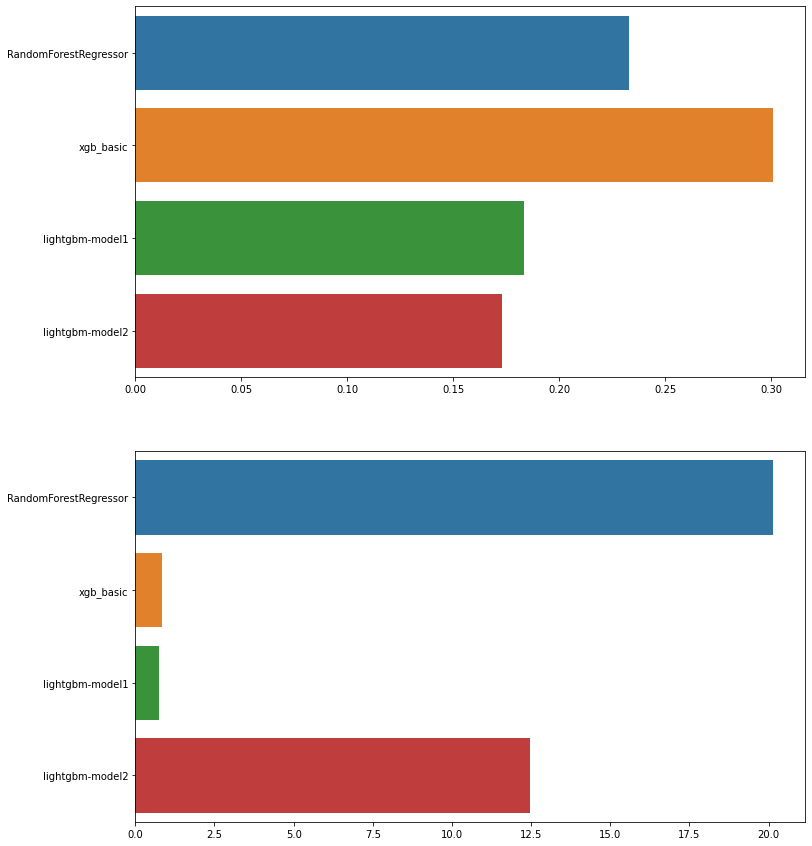

In [17]:
plt.figure(figsize=(12,15))  ##전체 그래프 크기 지정
plt.subplot(2,1,1)
sns.barplot(x=model_score , y=model_list, data=dat)
plt.subplot(2,1,2)
sns.barplot(x=model_time , y=model_list, data=dat)

In [18]:
# 최종 모델 선택 및 제출
model_RF = RandomForestRegressor(random_state=30)
model_RF.fit(X_train, y_train)
pred1 = model_RF.predict(X_test)

# 최종 모델 선택 및 제출
m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm2.fit(X_train, y_train)
pred2 = m_lgbm2.predict(X_test)

sub['count'] = np.expm1(pred1) * 0.2 + np.expm1(pred2) * 0.8 
sub.to_csv("sub_v07_lgbm_rf_add.csv", index=False)